In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [7]:
# 두부조림 directory path
image_path_tofu = "mush"

In [8]:
# 버섯볶음 directory path
image_path_mushroom = "tofu"

In [69]:
# loadimages in directory
def loadImages(path):
    name = [name.replace(".jpg","") for name in os.listdir(path)]
    image_files = [path + "\\" + file for file in os.listdir(path) if file.endswith(".jpg")]
    return image_files, name

In [23]:
# Display one image
def display_one(image, title = 'original'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [27]:
# Display two image
def display(image1, image2, title1 = 'original', title2 = 'Editied'):
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.xticks([])
    plt.yticks([])
    plt.show()

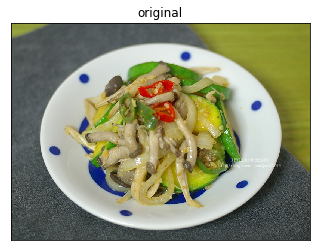

In [25]:
data = loadImages(image_path_tofu)
# stream = [open(path.encode("utf-8") , "rb") for path in data]
# read_bytes = [bytearray(data.read()) for data in stream]
# numpyArray = [np.asarray(byte, dtype=np.uint8) for byte in read_bytes]
img = cv2.imread(data[1])
display_one(img)
# img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
 #display_one(img[1])


In [74]:
def preprocessing(path):
    # loading image
    # Getting 3 images to work with
    data, names = loadImages(path)
    # stream = [open(path.encode("utf-8") , "rb") for path in data]
    # read_bytes = [bytearray(data.read()) for data in stream]
    # numpyArray = [np.asarray(byte, dtype=np.uint8) for byte in read_bytes]
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
    display_one(img[1])

    height = 220
    width = 220
    dim = (width, height)
    res_img = []

    for i in range(len(img)):
        try:
            res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
            res_img.append(res)
        except:
            print(str(i) + " error")
            del names[i]

    # checking the size
    print("RESIZED", res_img[1].shape)

    # Visualizing one of the images in the array
    original = res_img[1]

    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5,5),0)
        no_noise.append(blur)

    image = no_noise[1]
    display(original, image, 'original', 'blured')
    
    os.mkdir(path + "_train")
    
    for i in range(len(no_noise)):
        cv2.imwrite(path+"_train" + "\\" + names[i] + ".jpg",no_noise[i])

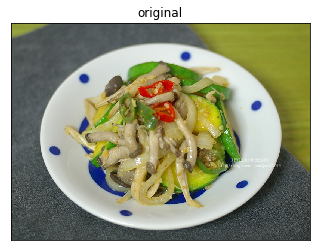

11 error
RESIZED (220, 220, 3)


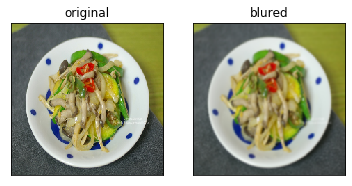

In [75]:
preprocessing(image_path_tofu)